# Predicting House Prices in Ames, Iowa

## Introduction & Problem Statement

Assessing the value of a house is a challenging task. Buyers must make educated decisions on how much they are willing to pay. Likewise, owners
should know the value of their home should they decide to sell. In order to determine the selling price of a homee, factors such as location, exterior, and more should be taken into account. Therefore, my goal is to provide meaningful insights into what contributes to a home’s selling price while also aiming to construct a regression model to predict housing sale prices.

I will be using a popular housing dataset from Ames, Iowa. This particular version of that dataset contains over 1,500 entries of homes sold from 2006 to 2010 with about 80 descriptive features involved in assessing home values. First, I will perform a comprehensive exploration of the data to understand the relationships among the most important variables to sale price, as well as identify any skewness, outliers, and missing values. Then, after cleaning the data and undergoing feature selection, I will create a machine learning model to predict house sale prices. The model's efficacy will be evaluated using root mean squared error (RMSE), a metric gauging the disparity between predicted and observed values.

#### Import Libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import warnings

#### Load Data

In [39]:
train = pd.read_csv('datasets/train.csv')

## Exploratory Data Analysis

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1538 non-null   int64  
 1   Id               1538 non-null   int64  
 2   PID              1538 non-null   int64  
 3   MS SubClass      1538 non-null   int64  
 4   MS Zoning        1538 non-null   object 
 5   Lot Frontage     1285 non-null   float64
 6   Lot Area         1538 non-null   int64  
 7   Street           1538 non-null   object 
 8   Alley            111 non-null    object 
 9   Lot Shape        1538 non-null   object 
 10  Land Contour     1538 non-null   object 
 11  Utilities        1538 non-null   object 
 12  Lot Config       1538 non-null   object 
 13  Land Slope       1538 non-null   object 
 14  Neighborhood     1538 non-null   object 
 15  Condition 1      1538 non-null   object 
 16  Condition 2      1538 non-null   object 
 17  Bldg Type     

### General Observations: 
* 1538 entries
* 82 columns
* There is definitely some missing data

In [7]:
# Summary statistics 
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1538.0,1.024971e+03,5.888600e+02,0.0,5.222500e+02,1022.0,1.528750e+03,2050.0
Id,1538.0,1.469562e+03,8.408143e+02,1.0,7.482500e+02,1483.5,2.189750e+03,2930.0
PID,1538.0,7.118700e+08,1.886513e+08,526301100.0,5.284562e+08,535451075.0,9.071308e+08,924151050.0
MS SubClass,1538.0,5.698309e+01,4.321725e+01,20.0,2.000000e+01,50.0,7.000000e+01,190.0
Lot Frontage,1285.0,6.937821e+01,2.409554e+01,21.0,5.800000e+01,68.0,8.000000e+01,313.0
Lot Area,1538.0,9.955676e+03,5.427477e+03,1476.0,7.473000e+03,9487.5,1.149800e+04,63887.0
Overall Qual,1538.0,6.109883e+00,1.428502e+00,1.0,5.000000e+00,6.0,7.000000e+00,10.0
Overall Cond,1538.0,5.559818e+00,1.100363e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.0
Year Built,1538.0,1.971861e+03,3.017384e+01,1872.0,1.954000e+03,1975.0,2.001000e+03,2010.0
Year Remod/Add,1538.0,1.984168e+03,2.092636e+01,1950.0,1.965000e+03,1993.0,2.003750e+03,2010.0


### More Specific Observations: 
* Homes were sold between years of 2006 - 2010
* Homes were built from year 1872 - 2010
* Sale Price ranges from 13,100 up to 611,657
* There is a substantial amount of categorical columns denoting quality and condition of various features

## Exploratory Visualizations

### First I want to see which numeric features have a strong positive correlation with Sale Price. Let's take a look using scatterplots!

In [8]:
# mask for numeric and categorical features
num_features = [col for col in train._get_numeric_data().columns]
cat_features = [col for col in train.select_dtypes(include=['object']).columns]

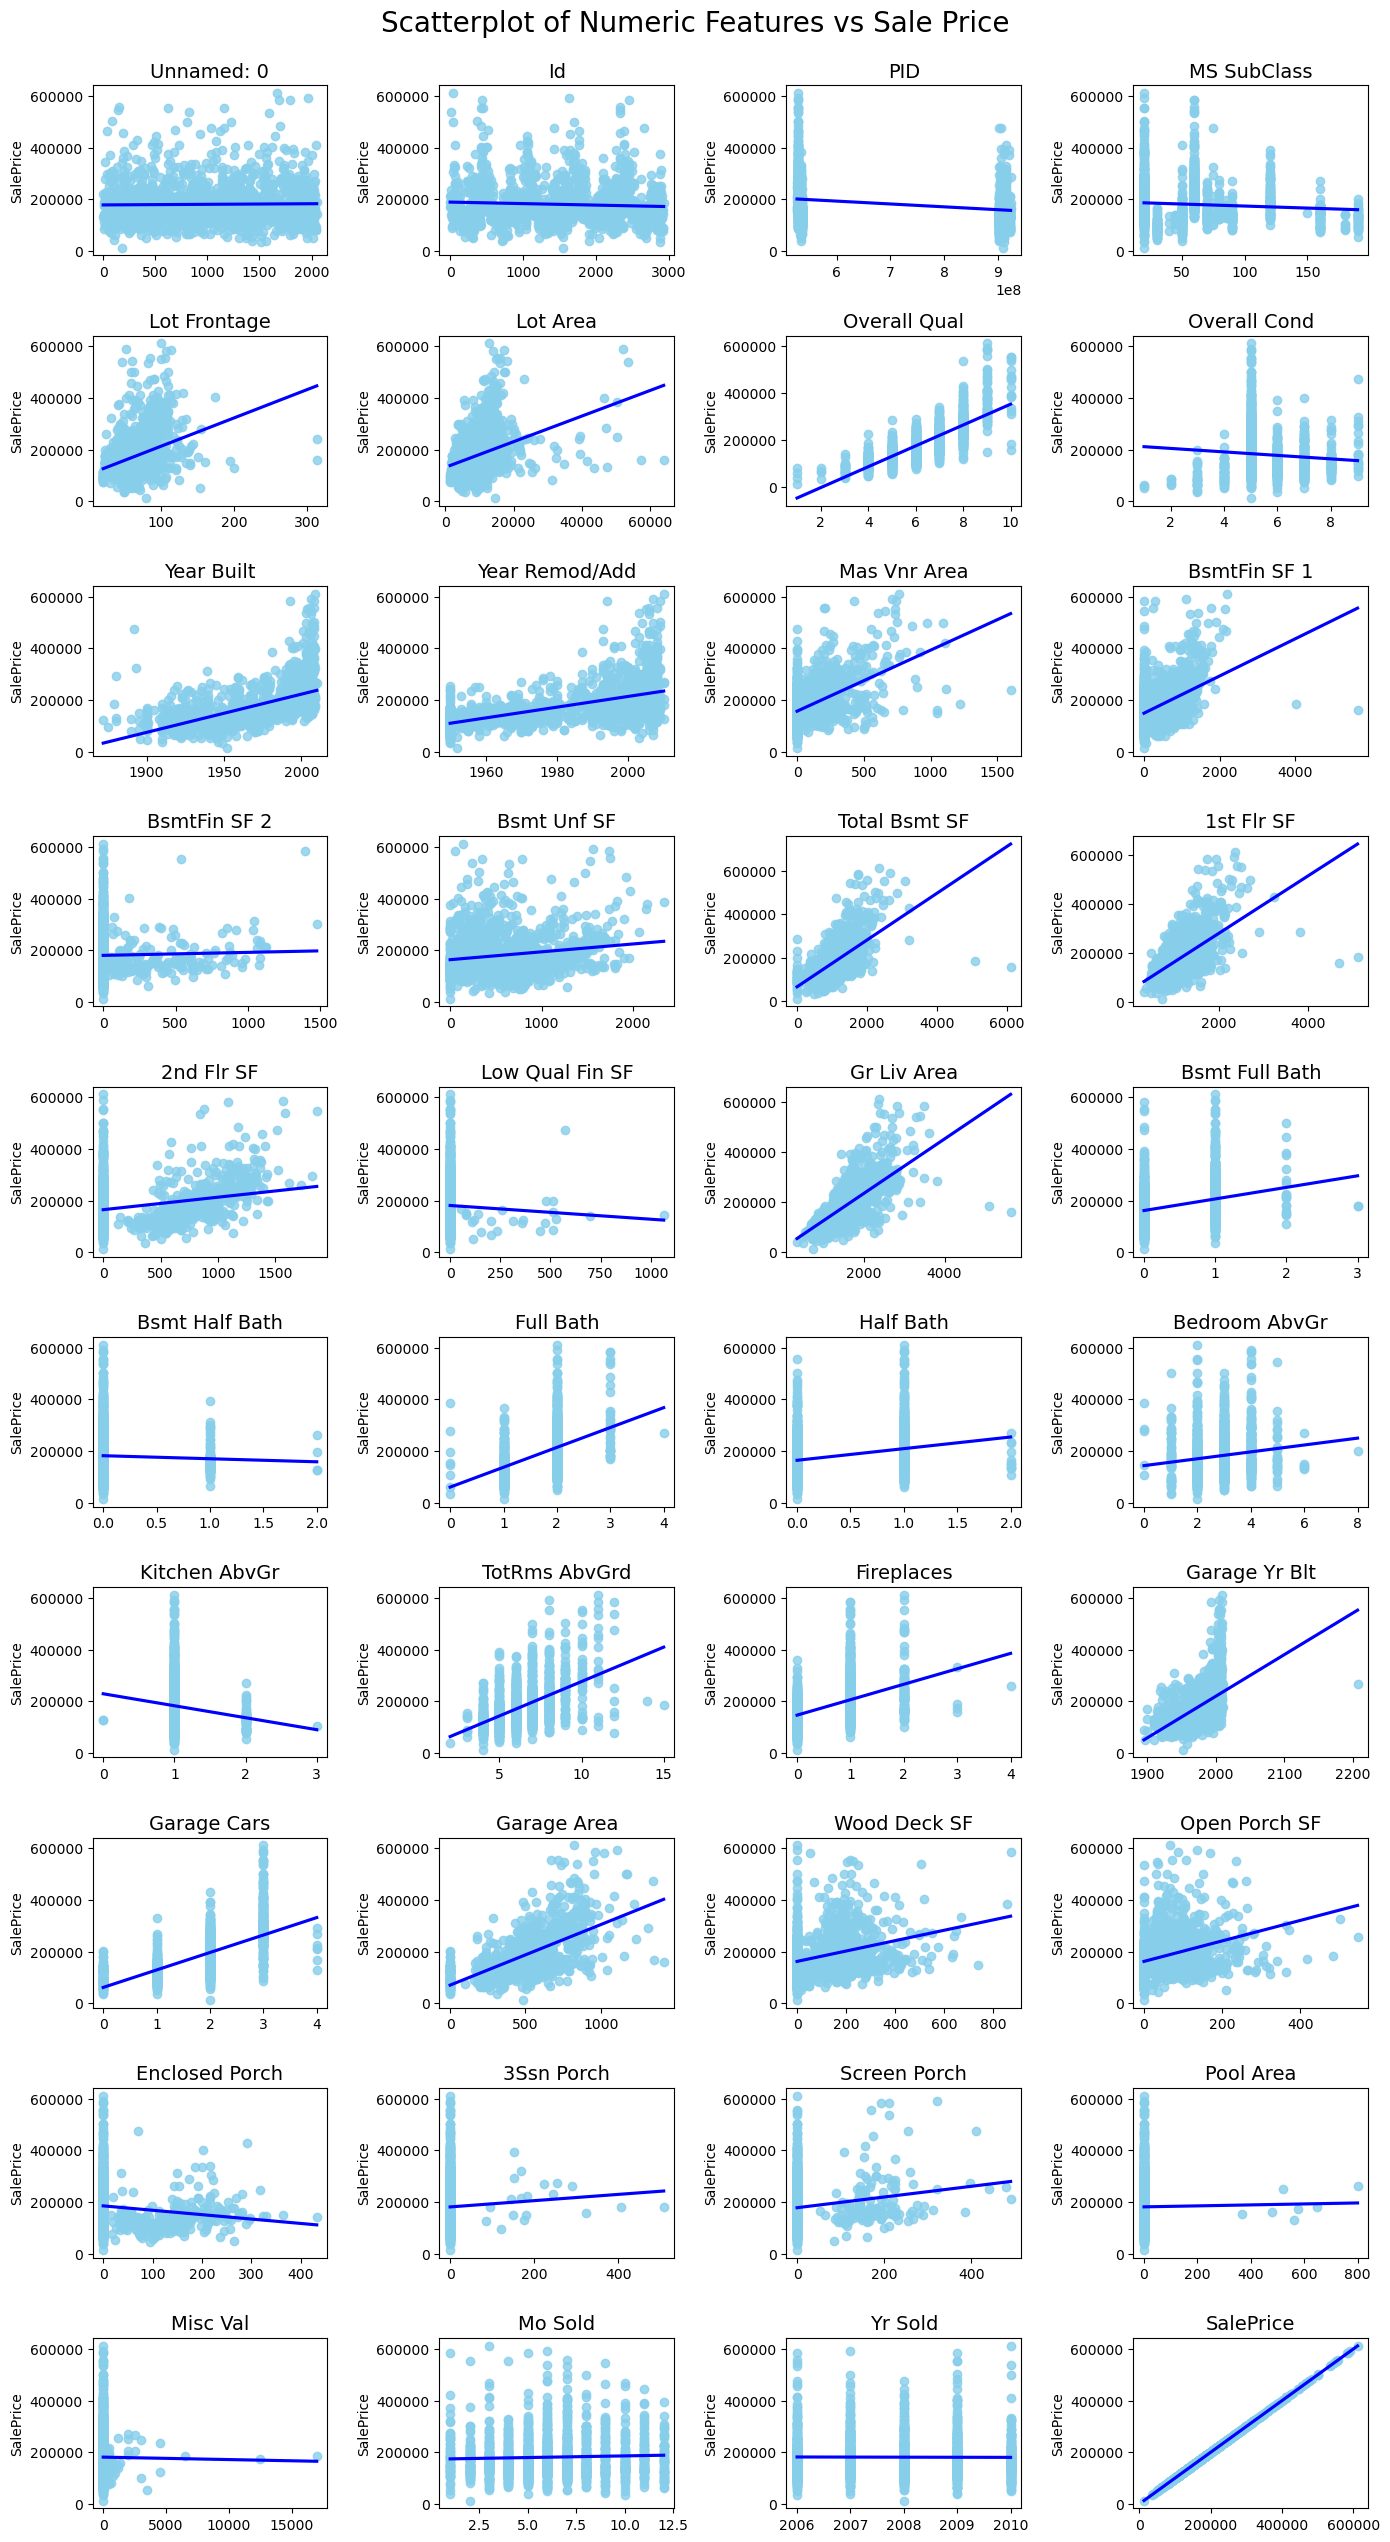

In [9]:
# Plot scatterplots of numeric features
def eda_scatterplot(dataframe, list_of_columns, target):    
    nrows = int(np.ceil(len(list_of_columns) / 4))
    ncols = 4
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows*2.5))
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        sns.regplot(data=dataframe, x=column, y=target, ax=ax[i], ci=None, color='skyblue', line_kws={'color': 'blue'})
        ax[i].set_title(column, fontsize=14)
        ax[i].set_xlabel('')
        plt.tight_layout()
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # Start from -1
    plt.suptitle('Scatterplot of Numeric Features vs Sale Price', fontsize=20, y=1.015)

eda_scatterplot(train, num_features, 'SalePrice')

#### Out of all the above scatterplots, Overall Qual, Gr Liv Area, Garage Area, and Garage Cars are sticking out to me as very related to sale price! 

### Next, I want to see the distribution of the numeric features in order to understand their prevalence in the dataset and to identify any skewness! Histograms are great for visualizing prevalance and skewed data.

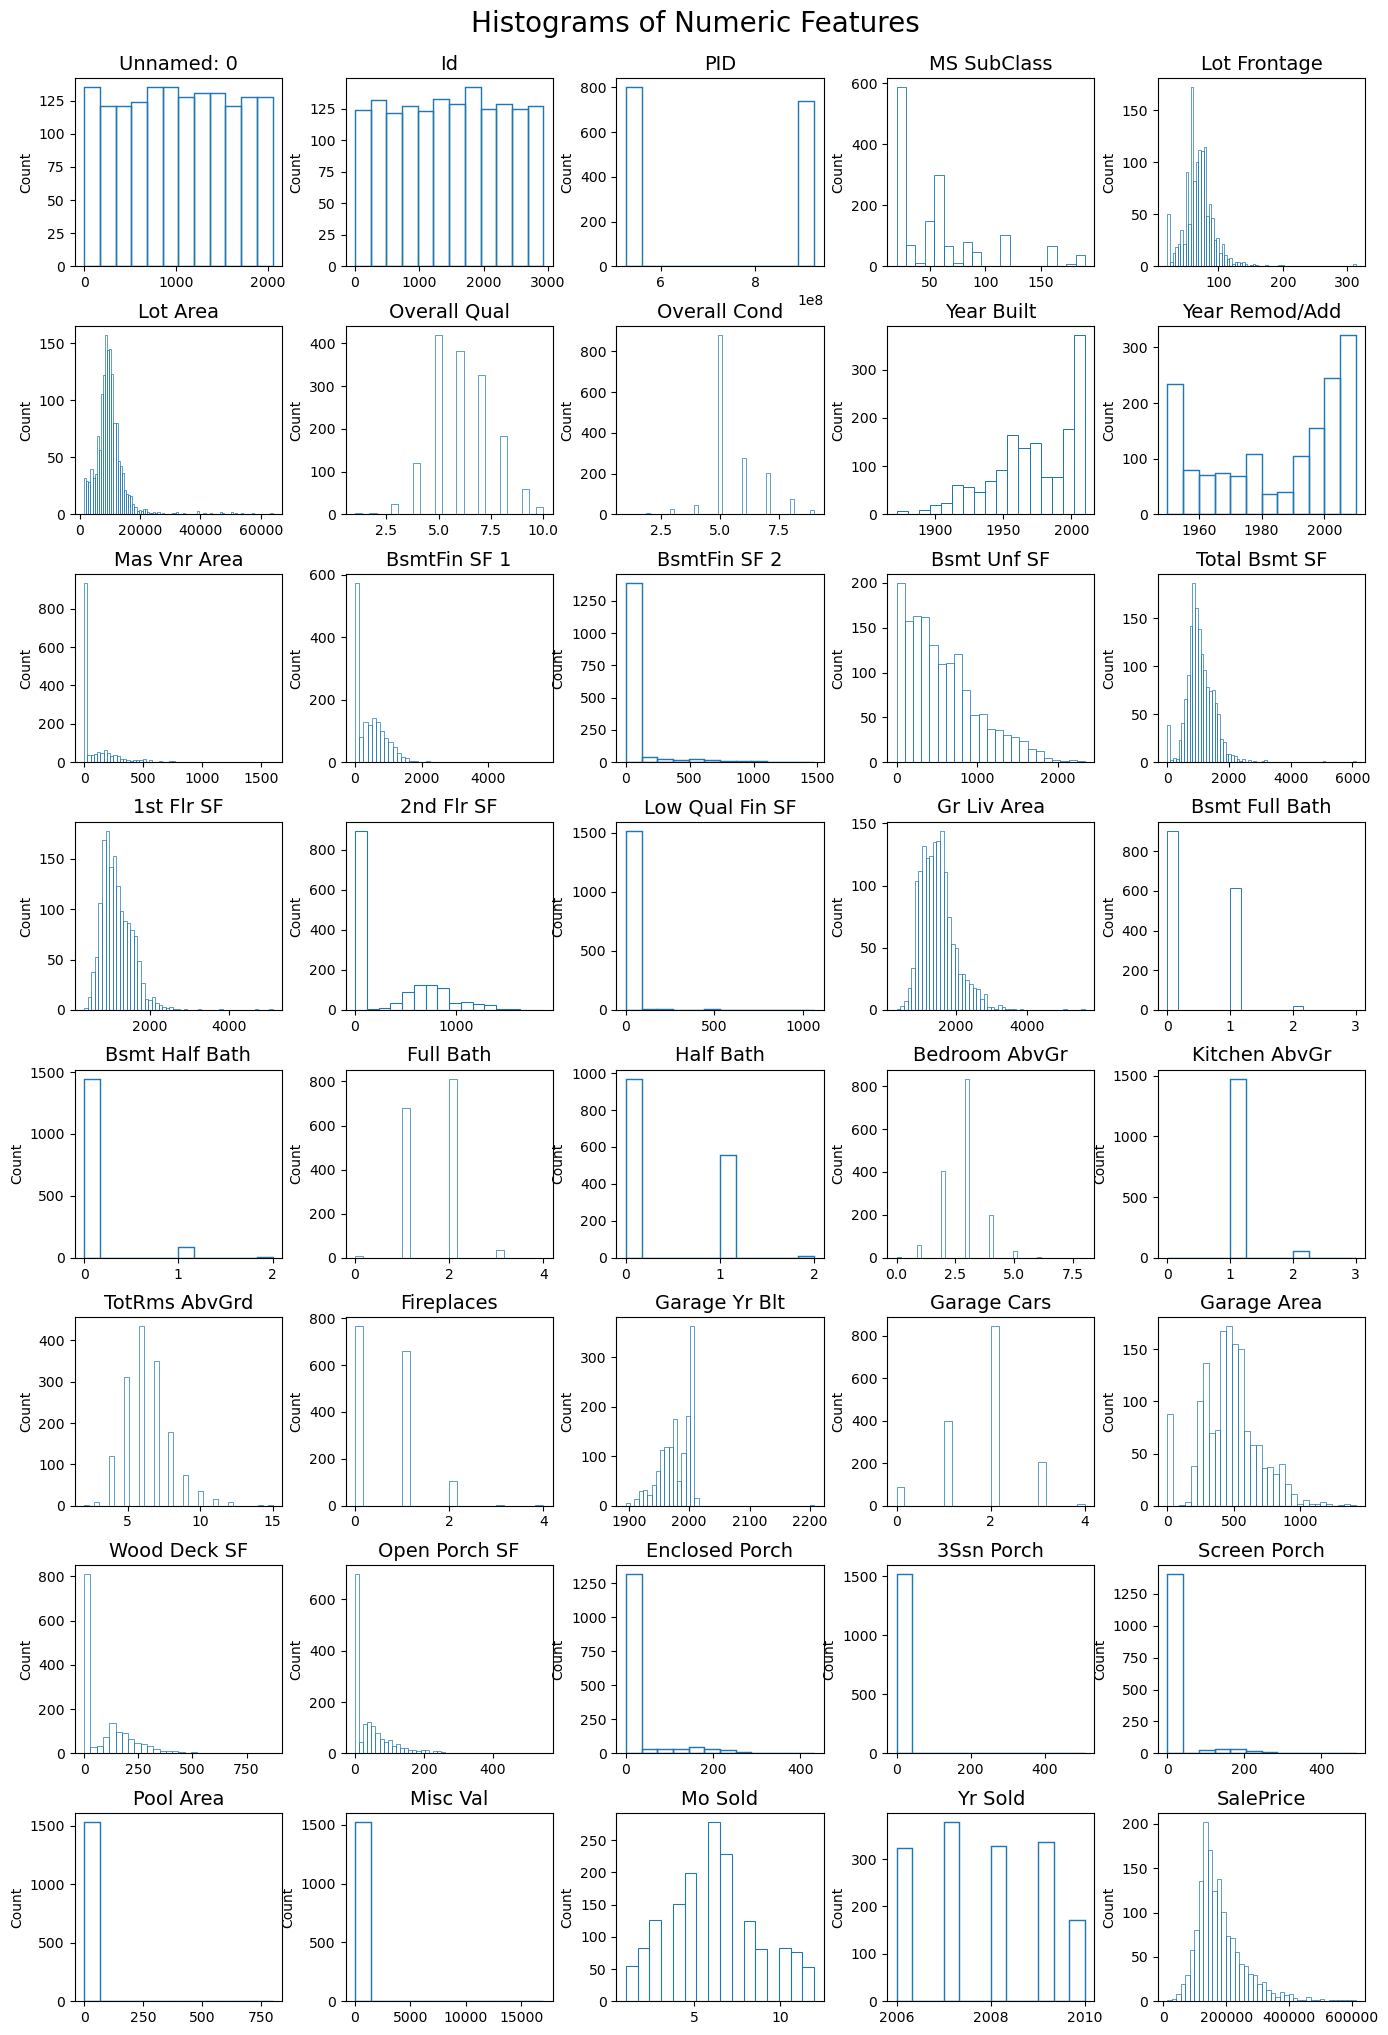

In [10]:
# Suppress FutureWarning about use_inf_as_na option
warnings.filterwarnings("ignore", category=FutureWarning)

# Plotting of numeric features
def eda_histograms(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns) / 5)) 
    ncols = 5
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 2.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.histplot(data=dataframe, x=dataframe[column], kde=False, ax=ax[i], fill=False)
        ax[i].set_title(column, fontsize=14)
        ax[i].set_xlabel('')
        ax[i].tick_params(labelsize=10)
    plt.tight_layout(h_pad=-0.4, w_pad=-0.4)
    
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False)  # Start from -1
        
    plt.suptitle('Histograms of Numeric Features', fontsize=20, y=1.015)

eda_histograms(train, num_features)

### I can see that the following features appear to be right-skewed: Sale Price, Open Porch SF, Wood Deck SF, 2nd Flr SF, Bsmt Unf SF, BsmtFin SF 1. What does this mean? Essentially it means that the bulk of the observations in those features are small to medium, with a few observations that are much larger than the rest.

### Now I want to visualize some of the cateogorical features and how they correlate with Sale Price as well as visualizing outliers. Boxplots are a great way to do this!

In [11]:
cat_features = [col for col in train.columns if train[col].dtype == 'object']

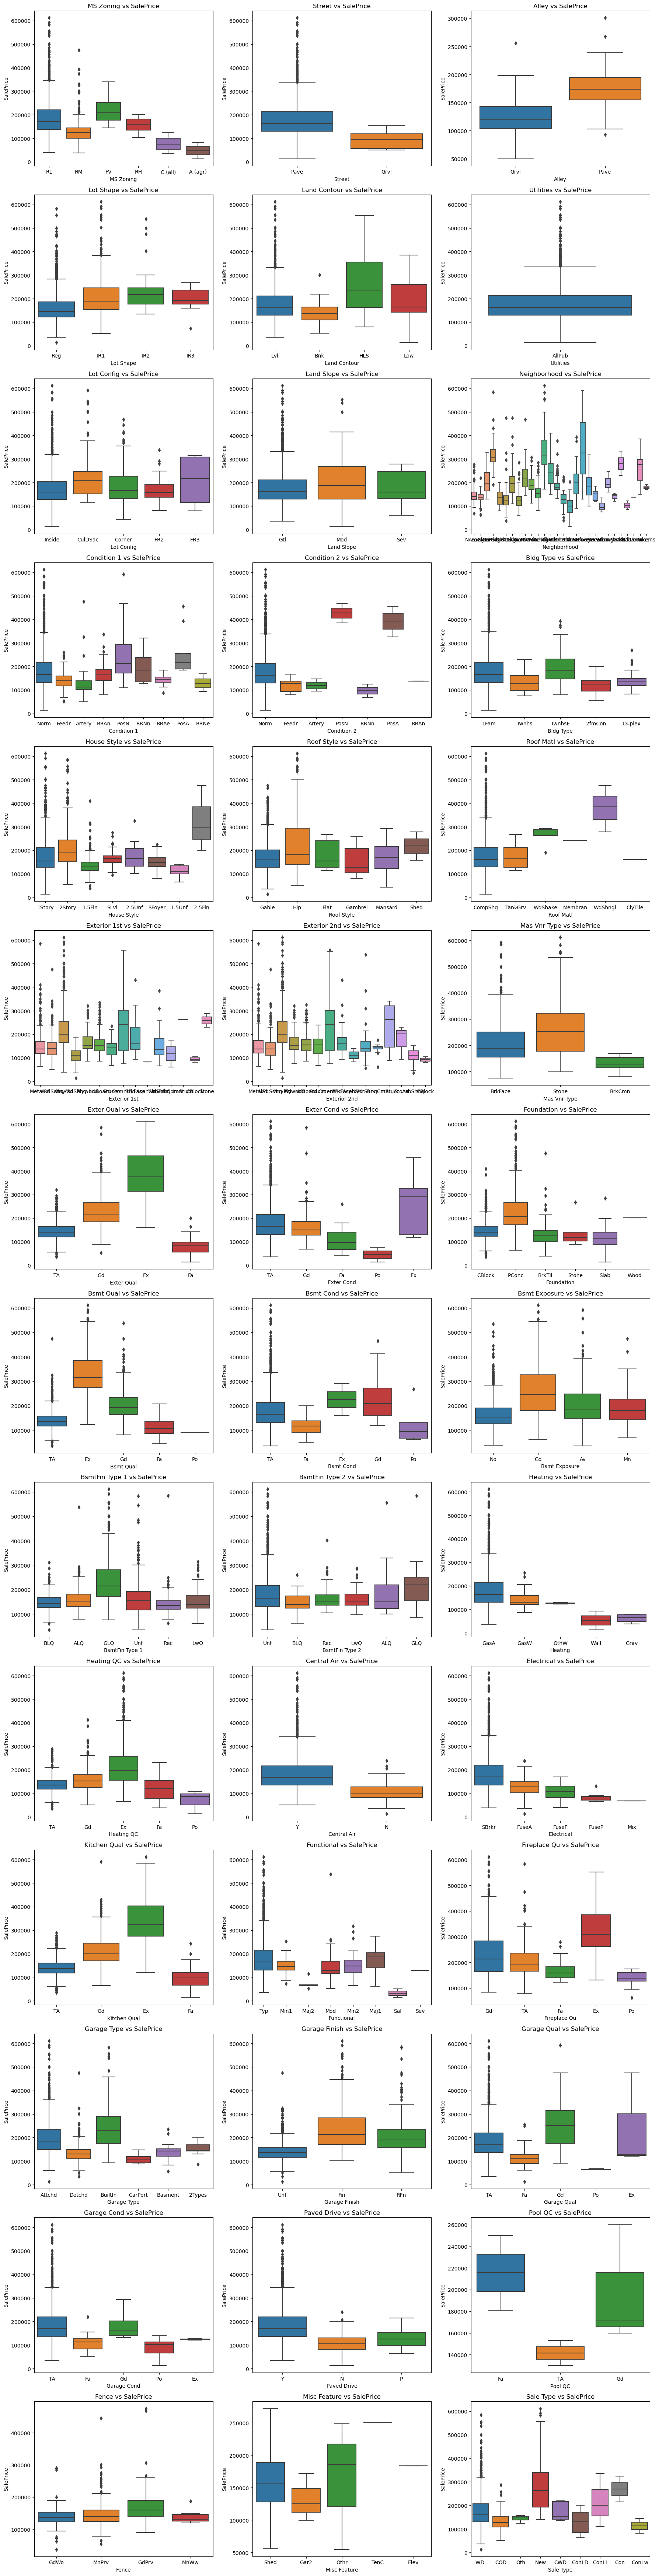

In [12]:
# Define the function to create boxplots for categorical features
def categorical_boxplots(dataframe, cat_features, target):
    nrows = len(cat_features) // 3 + (len(cat_features) % 3 > 0)
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(18, 5 * nrows))
    axes = axes.flatten()
    
    for i, cat_feature in enumerate(cat_features):
        sns.boxplot(x=cat_feature, y=target, data=dataframe, ax=axes[i])
        axes[i].set_title(f"{cat_feature} vs {target}")
        axes[i].set_xlabel(cat_feature)
        axes[i].set_ylabel(target)
    
    plt.tight_layout()
    plt.show()

# Usage
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.barplot(data=neighborhood_avg_saleprice_sorted, x='Neighborhood', y='SalePrice', palette='viridis')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Average Sale Price by Neighborhood (Low to High)')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()categorical_boxplots(train, cat_features, 'SalePrice')

### Immediately I can see that we have quite a few outliers in most categories. I also noticed that homes with wood shingles and stone exteriors sell for a lot more! The last feature that stood out to me is neighborhood-- it seems to really cause a lot of change in Sale Price. Let's take a closer look at different neighborhoods and the averae sale price of their homes in ascending order!

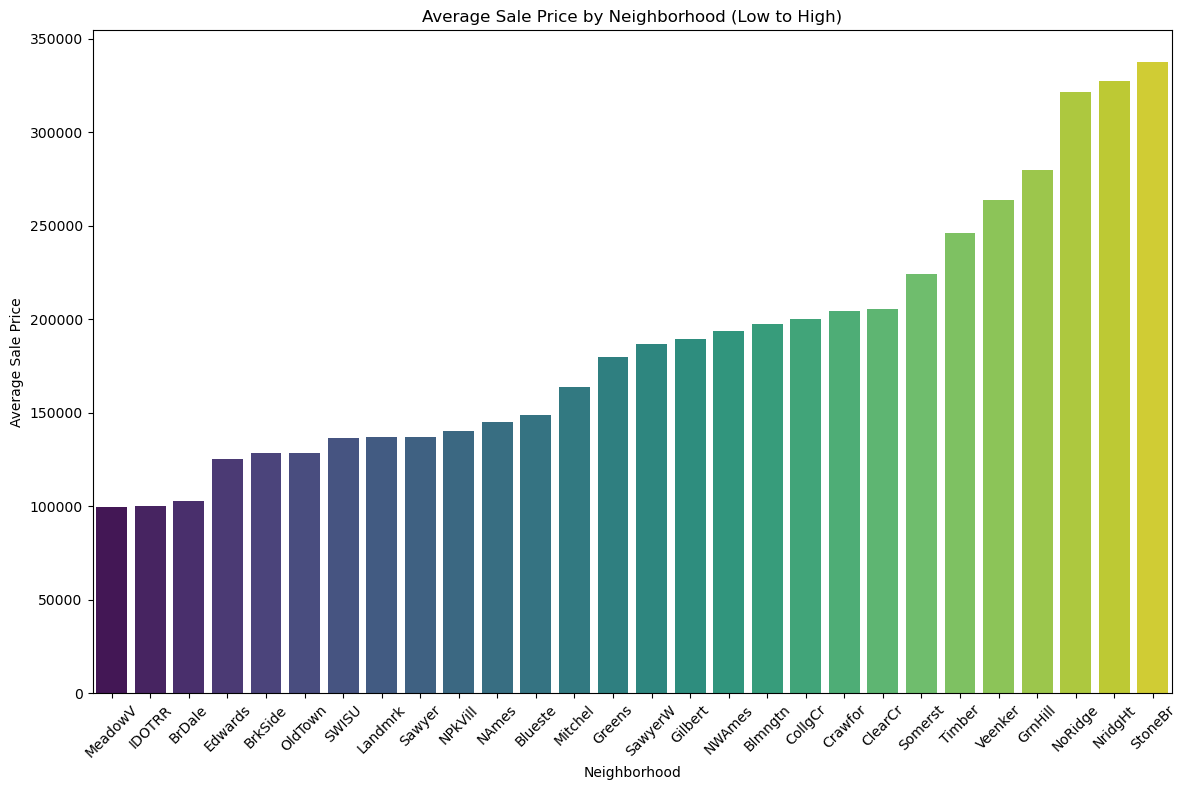

In [38]:
neighborhood_avg_saleprice = train_data.groupby('Neighborhood')['SalePrice'].mean().reset_index()
neighborhood_avg_saleprice_sorted = neighborhood_avg_saleprice.sort_values(by='SalePrice')
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.barplot(data=neighborhood_avg_saleprice_sorted, x='Neighborhood', y='SalePrice', palette='viridis')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Average Sale Price by Neighborhood (Low to High)')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### There is a reason why they say "location, location, location" -- It's not hard to see that the neighborhood a home is located in will have a significant effect on home sale price!

### Lastly, let's take a step back and get a bird's eye view of what features have the strongest effect on Sale Price!

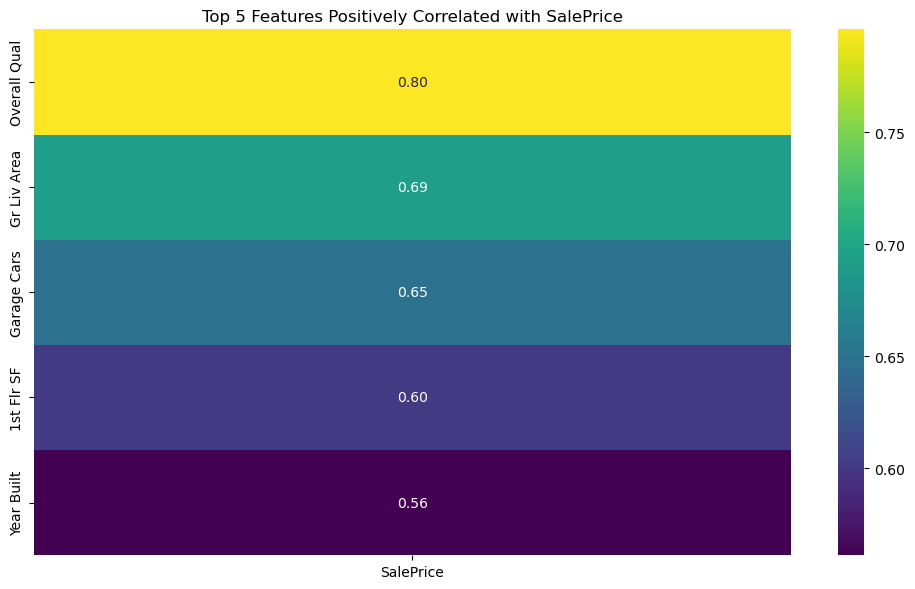

In [51]:
# Selecting numeric features excluding 'Total Bsmt SF' and 'Garage Area'
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).drop(columns=['Total Bsmt SF', 'Garage Area'])

# Calculating the correlation matrix
corr_matrix = numeric_features.corr()

# Selecting top 5 positively correlated features with SalePrice
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False).head(6)[1:]  # Excluding SalePrice itself

# Filtering the correlation matrix to include only the top 5 features and SalePrice
top_corr_matrix = corr_matrix.loc[top_corr_features.index, ['SalePrice']]

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=top_corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Top 5 Features Positively Correlated with SalePrice')
plt.tight_layout()
plt.show()

### The top 5 feature related to Sale Price are the overall quality of home, the gross living area, garage car capacity, garage area, 1st floor square footage and total basement square footage. This makes a lot of sense! Size matters a lot to home buyers as well as the quality of the materials that went into building the home. I will definitely take that into account when proceeding onto my data cleaning!